# Predict Customer Personality to Boost Marketing Campaign by using Machine Learning

## Import Library & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# rcParams['figure.figsize'] = (8,5)
# rcParams['lines.linewidth'] = 2.5
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'
# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
custom_params = {
    'figure.figsize':(8,5),
    'lines.linewidth':2.5,
    'axes.titlesize':20,
    'axes.labelsize':16,
    'xtick.labelsize':14,
    'ytick.labelsize':14,
    'axes.spines.right':False,
    'axes.spines.top':False
}
sns.set_theme(style='ticks', font_scale=1.25, context='notebook', rc=custom_params, palette='Set2')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# colors
red = '#E33131'
blue = '#3772FF'
gray = '#C0C5C1'
darkgray = '#858786'
yellow = '#F5D491'
orange = '#E89005'
black = '#080708'
white = '#FEFFFE'
green = '#4CB944'

In [5]:
df = pd.read_csv('D:/Development/Projects/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/Dataset/marketing_campaign_data.csv')

In [6]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df.shape

(2240, 29)

## Task 1

1. Melakukan feature engineering: conversion rate
2. Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
3. Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign
4. Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

In [12]:
df['Regis_Year'] = df['Dt_Customer']
df['Regis_Year'] = pd.to_datetime(df['Dt_Customer'])

df['Regis_Year'] = df['Regis_Year'].dt.strftime('%Y')
df['Regis_Year'] = df['Regis_Year'].astype(int)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [13]:
# Menghitung usia dari user
df['Age'] = 2022 - df['Year_Birth']
df['Age'] = df['Age'].astype(int)

df['Join_at_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

# Membuat Segment dari usia dari user
list_segment = [] # membuat list kosong
for i, kolom in df.iterrows(): # melakukan iterasi pada setiap baris dataframe
    if kolom['Age'] < 15:
        segment = 'Children'
    elif kolom['Age'] >= 15 and kolom['Age'] < 25:
        segment = 'Youth'
    elif kolom['Age'] >= 25 and kolom['Age'] < 32:
        segment = 'Young Adult'
    elif kolom['Age'] >= 32 and kolom['Age'] < 43:
        segment = 'Middle-Aged Adult'
    elif kolom['Age'] >= 43 and kolom['Age'] < 65:
        segment = 'Old-Aged Adult'
    else:
        segment = 'Seniors'
    list_segment.append(segment) # menambahkan list kosong dari item tiap row
    
df['Segment'] = list_segment

In [14]:
# Total Kids
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

# Is Parents
df['is_Parents'] = np.where(df['Total_Kids'] > 0, 1, 0)

# Total Spent
df['Total_Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Total Accept Campaign
df['Total_Accept_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Total Transcation
df['Total_Transactions'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

In [15]:
# Conversion Rate
def conv_rate(x, y):
    if y == 0:
        return 0
    return x / y * 100

df['Conversion_Rate'] = df.apply(lambda x: conv_rate(x['Total_Transactions'], x['NumWebVisitsMonth']), axis=1)

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Regis_Year,Age,Join_at_Age,Segment,Total_Kids,is_Parents,Total_Spent,Total_Accept_Campaign,Total_Transactions,Conversion_Rate
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,65,55,Seniors,0,0,1617000,0,25,357.142857
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,68,60,Seniors,2,1,27000,0,6,120.000000
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,57,48,Old-Aged Adult,0,0,776000,0,21,525.000000
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,38,30,Middle-Aged Adult,1,1,53000,0,8,133.333333
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,41,33,Middle-Aged Adult,1,1,422000,0,19,380.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2240 non-null   int64         
 1   Year_Birth             2240 non-null   int64         
 2   Education              2240 non-null   object        
 3   Marital_Status         2240 non-null   object        
 4   Income                 2216 non-null   float64       
 5   Kidhome                2240 non-null   int64         
 6   Teenhome               2240 non-null   int64         
 7   Dt_Customer            2240 non-null   datetime64[ns]
 8   Recency                2240 non-null   int64         
 9   MntCoke                2240 non-null   int64         
 10  MntFruits              2240 non-null   int64         
 11  MntMeatProducts        2240 non-null   int64         
 12  MntFishProducts        2240 non-null   int64         
 13  Mnt

In [18]:
nums = [col for col in df.columns if (df[col].dtype != 'O') and (col not in ['ID'])]
cats = [col for col in df.columns if df[col].dtype == 'O']

print('Numerical', nums)
print('Categorical', cats)

Numerical ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Regis_Year', 'Age', 'Join_at_Age', 'Total_Kids', 'is_Parents', 'Total_Spent', 'Total_Accept_Campaign', 'Total_Transactions', 'Conversion_Rate']
Categorical ['Education', 'Marital_Status', 'Segment']


In [19]:
df[nums].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Regis_Year,Age,Join_at_Age,Total_Kids,is_Parents,Total_Spent,Total_Accept_Campaign,Total_Transactions,Conversion_Rate
count,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013.028125,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,439.522231
std,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.684554,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,491.362402
min,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,122.222222
50%,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,260.000000
75%,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,535.000000
max,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,4300.000000


In [20]:
df[cats].describe()

,Education,Marital_Status,Segment
count,2240,2240,2240
unique,5,6,4
top,S1,Menikah,Old-Aged Adult
freq,1127,864,1350


In [21]:
for col in cats:
    print(col, ':')
    print(df[col].value_counts(dropna=False), '\n')

Education :
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64 

Marital_Status :
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64 

Segment :
Old-Aged Adult       1350
Seniors               466
Middle-Aged Adult     381
Young Adult            43
Name: Segment, dtype: int64 



In [22]:
df.isnull().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Regis_Year                0
Age                       0
Join_at_Age               0
Segment                   0
Total_Kids                0
is_Parents                0
Total_Spent         

Hasil observasi dari descriptive statistics:
- Terdapat sebanyak 2240 rows
- Ada kolom yang memiliki *null values* yaitu kolom `Income`

Insight dari descriptive statistics:
- User di dominasi pada segment *Old Aged Adult* yang berada pada rentang umur 43 - 65 sebanyak 1350
- User di dominasi dengan yang memiliki status menikah sebanyak 864

### Correlation Heatmap

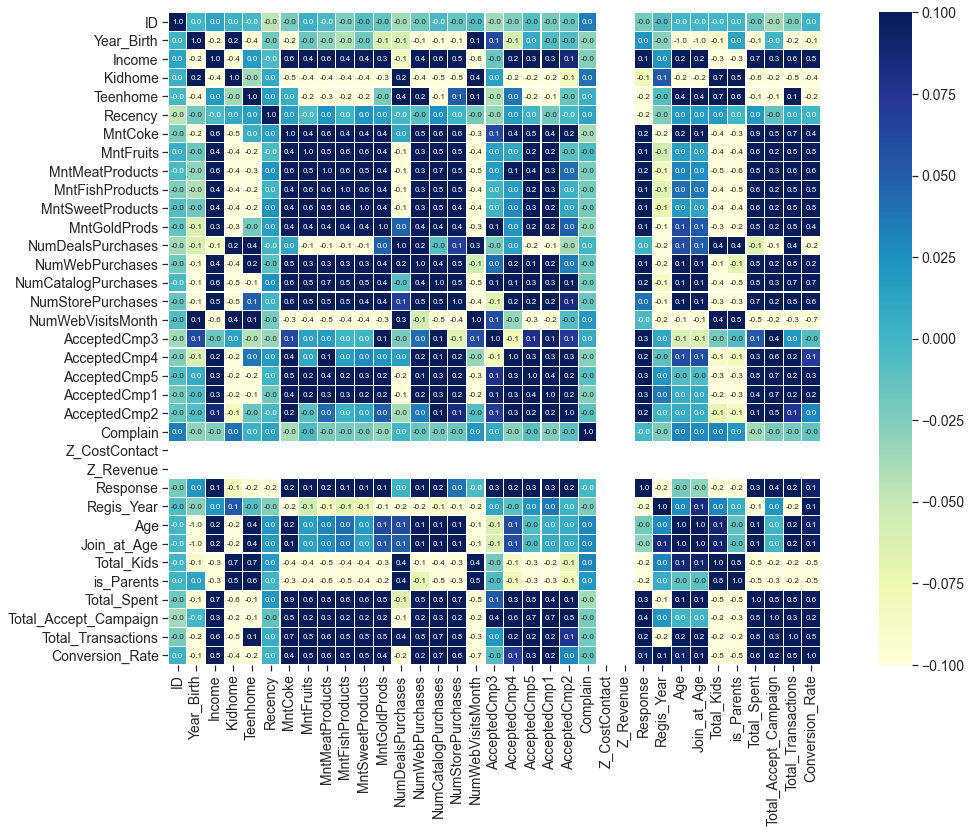

In [23]:
# Correlation
plt.figure(figsize=(21, 12))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f',
           vmin=df.corr().values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})
plt.show()

Insight:
- `Conversion_Rate` memiliki korelasi positif dengan `Total_Spent` sebesar 0.6
- `Conversion_Rate` memiliki korelasi positif dengan `Income` sebesar 0.5

### Total Spent & Income

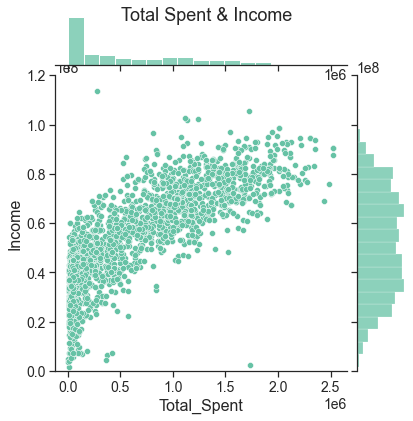

In [24]:
# Joint Plot
g = sns.jointplot(data=df, x='Total_Spent', y='Income', kind='scatter')
g.fig.suptitle('Total Spent & Income')
g.ax_marg_y.set_ylim(0, 120000000)
plt.show()

### Conversion Rate & Income

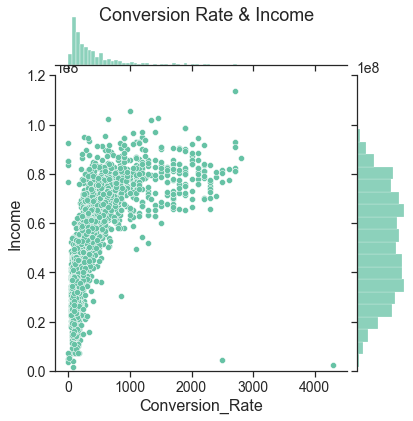

In [25]:
# Joint Plot
g = sns.jointplot(data=df, x='Conversion_Rate', y='Income', kind='scatter')
g.fig.suptitle('Conversion Rate & Income')
g.ax_marg_y.set_ylim(0, 120000000)
plt.show()

### Age & Total Spent

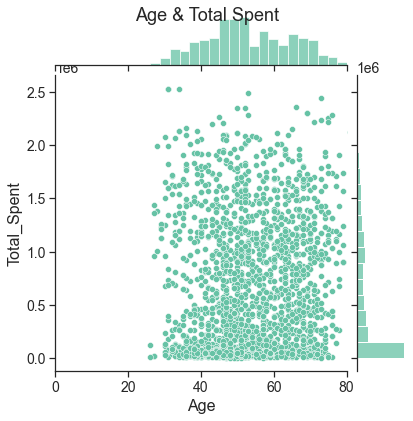

In [26]:
# Joint Plot
g = sns.jointplot(data=df, x='Age', y='Total_Spent', kind='scatter')
g.fig.suptitle('Age & Total Spent')
g.ax_marg_x.set_xlim(0, 80)
plt.show()

### Age & Income

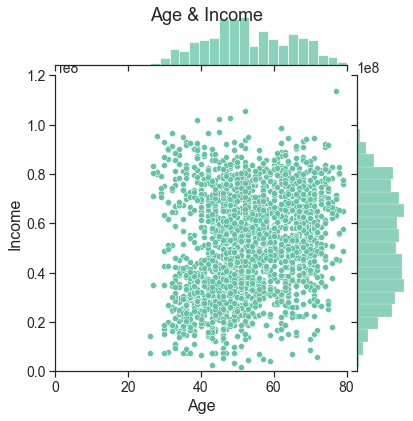

In [27]:
# Joint Plot
g = sns.jointplot(data=df, x='Age', y='Income', kind='scatter')
g.fig.suptitle('Age & Income')
g.ax_marg_x.set_xlim(0, 80)
g.ax_marg_y.set_ylim(0, 120000000)
plt.show()

### Age & Conversion Rate

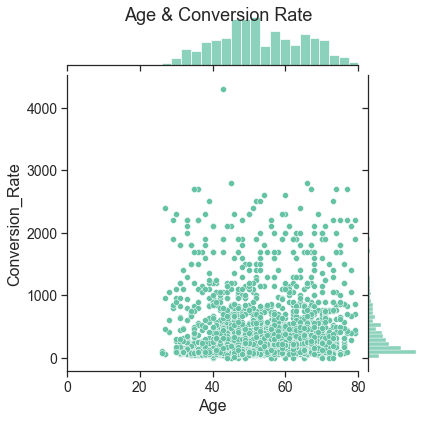

In [28]:
# Joint Plot
g = sns.jointplot(data=df, x='Age', y='Conversion_Rate', kind='scatter')
g.fig.suptitle('Age & Conversion Rate')
g.ax_marg_x.set_xlim(0, 80)
plt.show()

### Total Spent & Conversion Rate

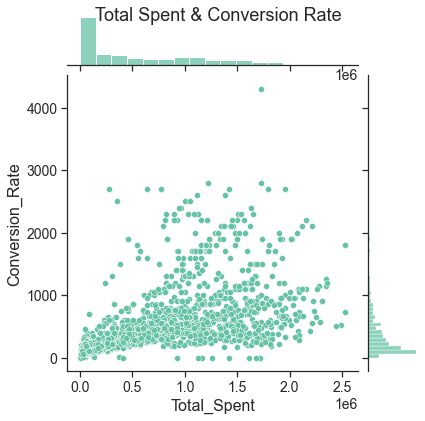

In [29]:
# Joint Plot
g = sns.jointplot(data=df, x='Total_Spent', y='Conversion_Rate', kind='scatter')
g.fig.suptitle('Total Spent & Conversion Rate')
plt.show()

## Task 2
- Mengatasi data null dan duplicated
- Membuang data yang tidak diperlukan
- Melakukan feature encoding
- Melakukan standardisasi pada feature

### Check Duplicated Data

In [30]:
df.duplicated().any()

False

### Check Null Values

In [31]:
df.isnull().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Regis_Year                0
Age                       0
Join_at_Age               0
Segment                   0
Total_Kids                0
is_Parents                0
Total_Spent         

Terdapat null values pada kolom `Income`

In [32]:
df = df.dropna()

In [33]:
df.shape

(2216, 39)

### Feature Encoding

In [34]:
# Label Encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education_Mapped'] = df['Education'].map(mapping_education)

In [35]:
df_cats = df[['Education']].copy()
# One Hot Encoder
for cat in ['Marital_Status', 'is_Parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df_cats = df_cats.join(onehots)

### Feature Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
ss = StandardScaler()

for col in nums:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head(3))

(2216, 40)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Regis_Year,Age,Join_at_Age,Segment,Total_Kids,is_Parents,Total_Spent,Total_Accept_Campaign,Total_Transactions,Conversion_Rate,Education_Mapped
0,5524,-0.986443,S1,Lajang,0.234063,-0.823039,-0.928972,-1.974875,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,-1.500343,0.986443,0.897752,Seniors,-1.264803,-1.581389,1.675488,-0.439265,1.319446,-0.167630,2
1,2174,-1.236801,S1,Lajang,-0.234559,1.039938,0.909066,1.665141,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.417393,1.236801,1.313688,Seniors,1.405806,0.632356,-0.962358,-0.439265,-1.157987,-0.652811,2
2,4141,-0.318822,S1,Bertunangan,0.769478,-0.823039,-0.928972,0.172132,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.041475,0.318822,0.315443,Old-Aged Adult,-1.264803,-1.581389,0.280250,-0.439265,0.797881,0.175797,2


In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Regis_Year,Age,Join_at_Age,Segment,Total_Kids,is_Parents,Total_Spent,Total_Accept_Campaign,Total_Transactions,Conversion_Rate,Education_Mapped
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,65,55,Seniors,0,0,1617000,0,25,357.142857,2
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,68,60,Seniors,2,1,27000,0,6,120.000000,2
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,57,48,Old-Aged Adult,0,0,776000,0,21,525.000000,2
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,38,30,Middle-Aged Adult,1,1,53000,0,8,133.333333,2
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,41,33,Middle-Aged Adult,1,1,422000,0,19,380.000000,4


## Task 3
- Melihat jumlah cluster yang tepat dengan menggunakan elbow method
- Melakukan implementasi clustering dengan menggunakan k-means clustering
- Menghitung sillhouette score melihat bagaimana performa model yang didapat

### Elbow Method

[56663.14627377809, 50956.36065425731, 47641.58760247579, 44994.887382582565, 42940.05229209161, 40946.80754057954, 39762.70261276922, 39322.19074583453, 37370.29232310941, 36658.00970188442, 35083.420081043834, 34730.54610338778, 33986.14262731061, 33310.879164289145]


<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

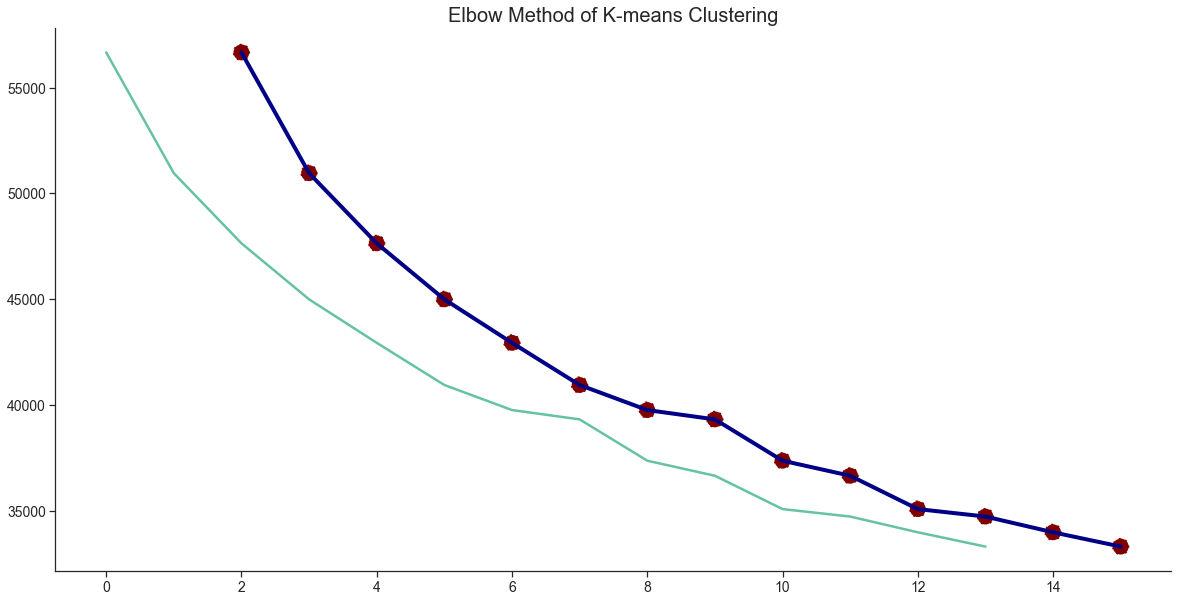

In [38]:
from sklearn.cluster import KMeans

X = df_scaled.drop(columns=['ID', 'Education', 'Marital_Status']).copy()
X = df_scaled[nums].copy()
inertia = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
plt.plot(inertia)

sns.lineplot(x=range(2, 16), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 16), y=inertia, s=300, color='#800000',  linestyle='--')

### K-Means Clustering

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['Cluster'] = kmeans.labels_
df['Cluster'] = kmeans.labels_

In [40]:
X.tail()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Regis_Year,Age,Join_at_Age,Total_Kids,is_Parents,Total_Spent,Total_Accept_Campaign,Total_Transactions,Conversion_Rate,Cluster
2235,-0.151917,0.356642,-0.823039,0.909066,-0.124749,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.041475,0.151917,0.149069,0.070501,0.632356,1.217598,-0.439265,0.406708,-0.161784,1
2236,-1.904422,0.467539,2.902916,0.909066,1.940508,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,0.0,0.0,-0.420530,1.417393,1.904422,1.979184,2.741110,0.632356,-0.270546,1.033369,0.928273,-0.255313,1
2237,1.016420,0.188091,-0.823039,-0.928972,0.847643,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.417393,-1.016420,-0.932363,-1.264803,-1.581389,1.051696,1.033369,0.537099,-0.250442,0
2238,-1.069896,0.675388,-0.823039,0.909066,0.843341,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.417393,1.069896,1.147313,0.070501,0.632356,0.391404,-0.439265,1.058664,0.670234,1
2239,-1.236801,0.024705,1.039938,0.909066,-1.161680,-0.311405,-0.655568,-0.587058,-0.472705,-0.651038,-0.633880,-0.443313,0.351713,-0.396043,-0.571082,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,-1.500343,1.236801,1.147313,1.405806,0.632356,-0.721800,-0.439265,-0.506031,-0.576819,2


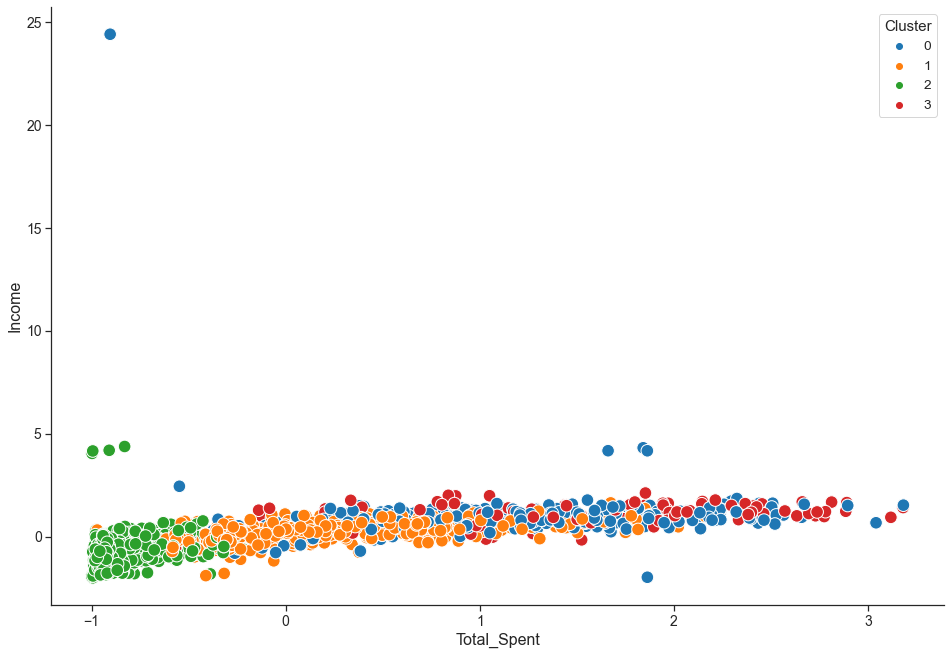

In [41]:
fig, ax = plt.subplots(figsize=(16, 11))
sns.scatterplot(data=X, x='Total_Spent', 
                y='Income', hue='Cluster',
                palette='tab10', s=160, ax=ax)
plt.show()

### Evaluation: Silhouette Score

In [42]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2, 10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

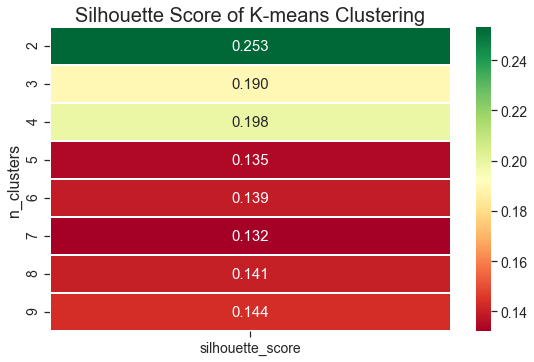

In [43]:
visualize_silhouette_layer(X)

## Task 4
- Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan
- Memilih cluster yang akan dilakukan marketing retargetting
- Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada

In [44]:
nums

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Regis_Year',
 'Age',
 'Join_at_Age',
 'Total_Kids',
 'is_Parents',
 'Total_Spent',
 'Total_Accept_Campaign',
 'Total_Transactions',
 'Conversion_Rate']

In [45]:
df_grouped_cluster = df[nums + ['Cluster']].groupby(['Cluster']).agg({'Total_Spent': ['count', 'mean', 'median', 'min', 'max'], 
                                                                      'Income':['count', 'mean', 'median', 'min', 'max']})

df_grouped_cluster

Total_Spent                                         Income                                                   
              count          mean   median     min      max  count          mean      median         min          max
Cluster                                                                                                              
0               428  1.299234e+06  1280500   62000  2525000    428  7.599751e+07  75063000.0   2447000.0  666666000.0
1               632  7.609399e+05   691500   22000  2092000    632  5.835857e+07  58765500.0   4428000.0   93404000.0
2              1024  9.772070e+04    64000    5000   473000   1024  3.498210e+07  34508000.0   1730000.0  162397000.0
3               132  1.577477e+06  1626000  265000  2524000    132  7.991435e+07  81389500.0  37929000.0  105471000.0

Insight:
- Cluster 0 -> Customer Middle Spending
- Cluster 1 -> Customer Risk of Churn
- Cluster 2 -> Customer Low Spending
- Cluster 3 -> Custoemr High Spending

In [46]:
map_cluster = {
    0 : 'Middle Spender',
    1 : 'Risk of Churn',
    2 : 'Low Spender',
    3 : 'High Spender'
}

df['Cluster_Mapped'] = df['Cluster'].map(map_cluster)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Middle Spender'),
  Text(1, 0, 'Low Spender'),
  Text(2, 0, 'Risk of Churn'),
  Text(3, 0, 'High Spender')])

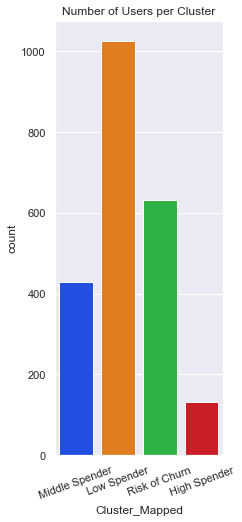

In [47]:
sns.set(rc={'figure.figsize':(3, 8)})
sns.countplot(x=df['Cluster_Mapped'], palette='bright')
plt.title('Number of Users per Cluster')
plt.xticks(rotation=20)

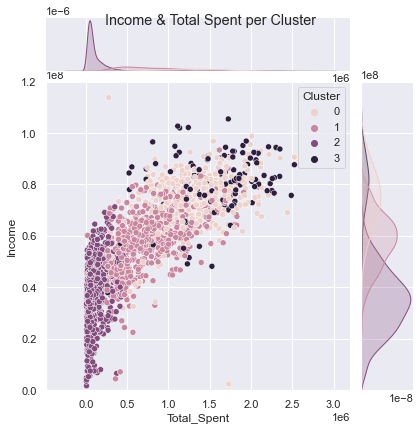

In [48]:
# Joint Plot
g = sns.jointplot(data=df, x='Total_Spent', y='Income', hue='Cluster')
g.fig.suptitle('Income & Total Spent per Cluster')
g.ax_marg_y.set_ylim(0, 120000000)
plt.show()

### Income per Cluster

Text(0.5, 1.0, 'Income per Cluster')

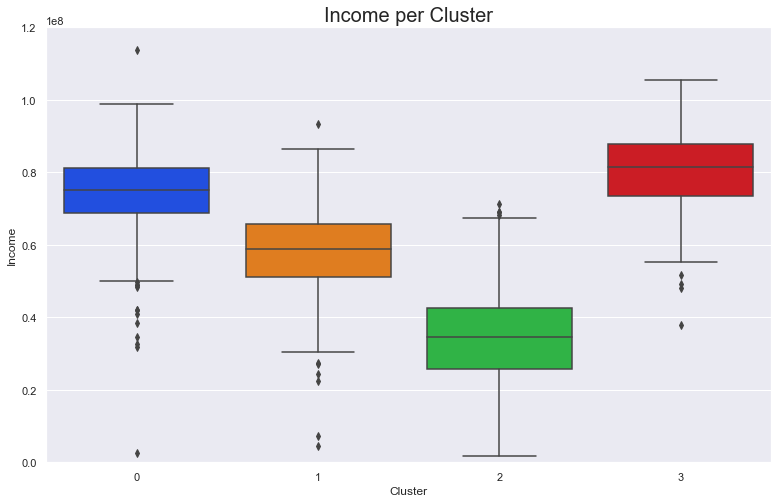

In [49]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="Cluster", y="Income", data=df, palette='bright')
plt.ylim(0, 120000000)
plt.title('Income per Cluster', fontsize=20)

### Total Spending per Cluster

Text(0.5, 1.0, 'Total Spending per Cluster')

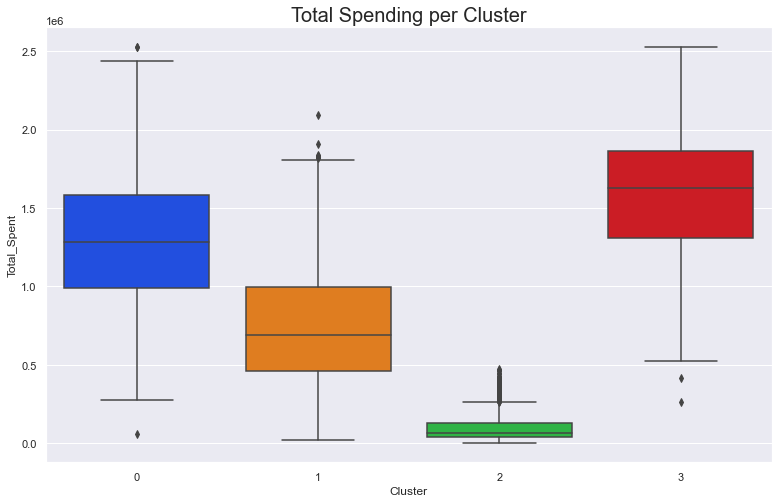

In [50]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="Cluster", y="Total_Spent", data=df, palette='bright')
plt.title('Total Spending per Cluster', fontsize=20)

### Conversion Rate per Cluster

Text(0.5, 1.0, 'Conversion Rate per Cluster')

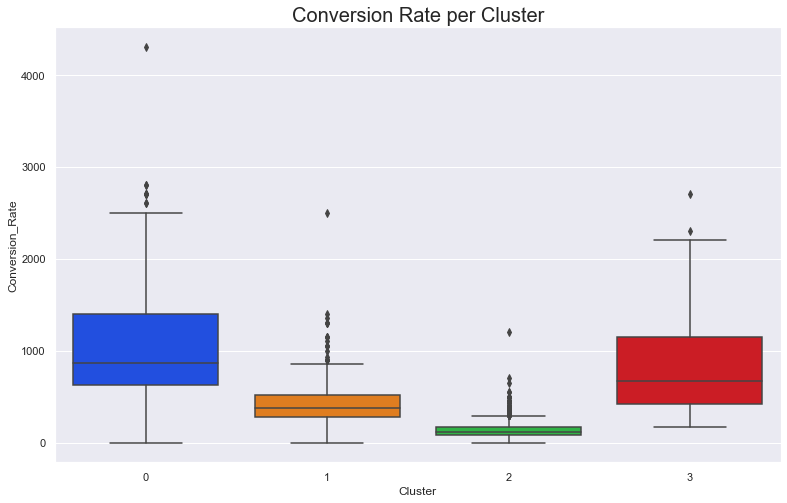

In [51]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="Cluster", y="Conversion_Rate", data=df, palette='bright')
plt.title('Conversion Rate per Cluster', fontsize=20)

### Total Web Visits per Cluster

Text(0.5, 1.0, 'Total Web Visits per Cluster')

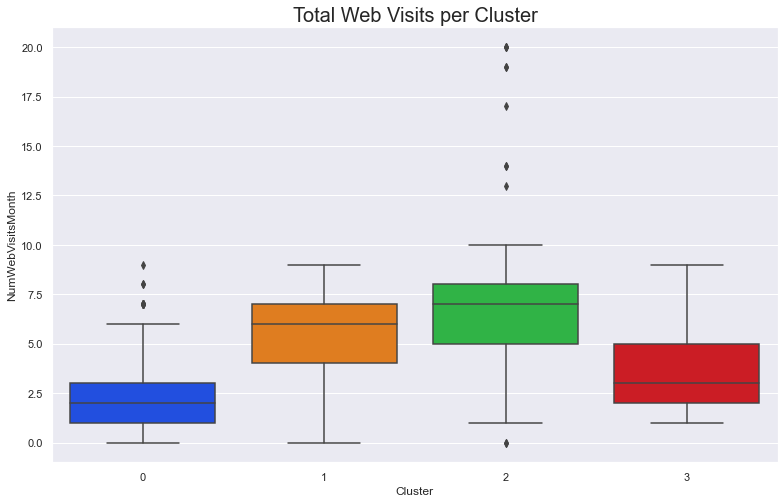

In [52]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="Cluster", y="NumWebVisitsMonth", data=df, palette='bright')
plt.title('Total Web Visits per Cluster', fontsize=20)

### Total Deal Purchases per Cluster

Text(0.5, 1.0, 'Total Deal Purchases per Cluster')

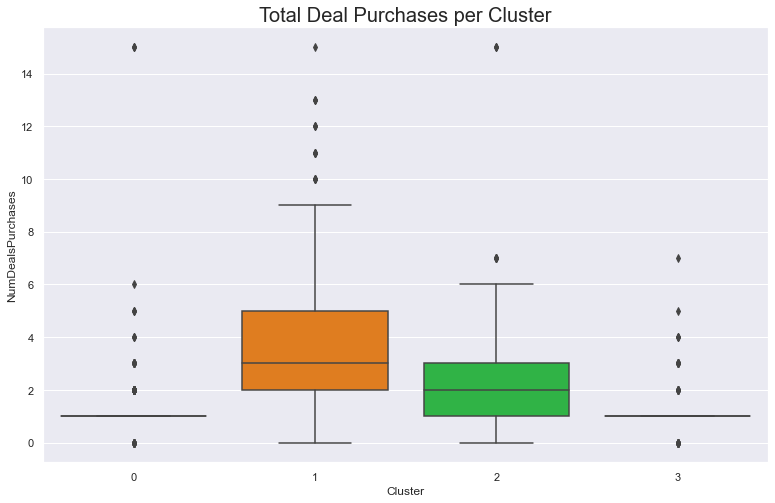

In [53]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="Cluster", y="NumDealsPurchases", data=df, palette='bright')
plt.title('Total Deal Purchases per Cluster', fontsize=20)

## Insight

1. Cluster 2 atau `Low Spender` didominasi oleh segmen usia *Middle-Aged Adult* (32 - 42 tahun) dan *Old-Aged Adult* (43 - 64 tahun) yang dominan memiliki anak 1. Kelompok ini cukup sering mengunjungi website setelah Cluster 1.

2. Cluster 1 atau `Risk of Churn` didominasi oleh segmen usia *Middle-Aged Adult* (32 - 42 tahun) dan *Old-Aged Adult* (43 - 64 tahun) yang dominan memiliki anak dengan jumlah 1 - 2. Kelompok ini sering mengunjungi website dengan median lebih dari 5 kali.

3. Cluster 0 atau `Middle Spender` didominasi oleh segmen usia *Middle-Aged Adult* (32 - 42 tahun) dan *Old-Aged Adult* (43 - 64 tahun) yang dominan tidak memiliki anak. Kelompok ini tidak cukup sering mengunjungi website setiap bulannya.

4. Cluster 3 atau `High Spender` didominasi oleh segmen usia *Middle-Aged Adult* (32 - 42 tahun) yang dominan tidak memiliki anak. Kelompok ini cukup sering mengunjungi website setelah Cluster 0.